## A different basis set

It is important to understand that a basis set is just a means to an end: we choose it when representing a particular system for convenience, or because of simple mathematical operations, or other reasons.  In previous notebooks when looking at the square well, we used a basis set of the simple square well (sine functions) for obvious reasons.  In this notebook we will develop an alternative basis set for the square well, and explore its functionality.

An obvious set of functions to choose are polynomials: the set is easy to extend, and algebraic manipulations are simple.  We start with simple definitions.

In [1]:
# Import libraries and set up in-line plotting.
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np
# This is a new library - linear algebra includes solving for eigenvalues & eigenvectors of matrices
import numpy.linalg as la

# Define the x-axis
width = 1.0
num_x_points = 101
x = np.linspace(0.0,width,num_x_points)
dx = width/(num_x_points - 1)

# Integrate the product of two functions over the width of the well
# NB this is a VERY simple integration routine: there are much better ways
def integrate_functions(function1,function2,dx):
    """Integrate the product of two functions over defined x range with spacing dx"""
    # We use the NumPy dot function here instead of iterating over array elements
    integral = dx*np.dot(function1,function2)
    return integral

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


We now define the basis set.  We know that it must go to zero at $x=0$ and $x=a$ (for a well of width $a$).  The simplest polynomial that will do this is a quadratic like $x(a-x)$ so we'll start with this.  We can then extend the basis by multiplying by extra x terms.  How do we define a sensible way to do this ? We'll draw on our knowledge of the system: we know that, with the eigenbasis, each successive basis function adds another node (another point where $\psi(x) = 0$).  We can add this easily by multiplying by $(x-b)$ and choosing the value of $b$ carefully.  You can see how I've done this below (if you're not happy with reading python, look at the output where it says "zero point").

There are two more things I've introduced below: a different way of finding the second derivative (a technique known as finite differences); and orthogonalisation.  I'll discuss orthogonalisation first.

It is much easier if a basis set is orthonormal (i.e. $\langle \phi_i \vert \phi_j \rangle = \delta_{ij}$ ).  Our polynomial basis set as defined isn't orthogonal (or normalised) so we use a procedure called Gram-Schmidt orthogonalisation to make it well behaved.  The idea is very simple: for each basis function, we project out components of previous functions: 

$$
\vert \phi_i^\prime\rangle = \vert \phi_i\rangle - \frac{\langle \phi_j^\prime\vert\phi_i\rangle }{\langle \phi_j^\prime\vert\phi_j^\prime\rangle}\vert \phi_j^\prime \rangle
$$

where we perform the operation for $j=1,\ldots,i-1$ and the new, orthonormalised functions have a prime. (To derive this, start by writing $\vert \phi_i^\prime \rangle = \vert \phi_i \rangle + \alpha \vert \phi_j^\prime \rangle$ and then solve for $\alpha$ by asserting that $\langle \phi_i^\prime \vert \phi_j^\prime \rangle = 0$.)

The finite differences method (which we use in the routine `second_derivative_finite` below) is based on finding a small change in a function coming from a small difference to find its derivative (as in the formal definition of differentiation, but without taking the limit where the difference becomes infinitely small).  The second derivative is just found as a small change in the first derivative.  While we could calculate the derivative analytically, this is somewhat simpler (and remarkably accurate provided that the number of points we use along the x axis is large enough).

n is  0
n is  1
zero point is  0.5
n is  2
zero point is  0.333333333333
zero point is  0.666666666667
n is  3
zero point is  0.25
zero point is  0.5
zero point is  0.75
n is  4
zero point is  0.2
zero point is  0.4
zero point is  0.6
zero point is  0.8
n is  5
zero point is  0.166666666667
zero point is  0.333333333333
zero point is  0.5
zero point is  0.666666666667
zero point is  0.833333333333
n is  6
zero point is  0.142857142857
zero point is  0.285714285714
zero point is  0.428571428571
zero point is  0.571428571429
zero point is  0.714285714286
zero point is  0.857142857143
n is  7
zero point is  0.125
zero point is  0.25
zero point is  0.375
zero point is  0.5
zero point is  0.625
zero point is  0.75
zero point is  0.875
n is  8
zero point is  0.111111111111
zero point is  0.222222222222
zero point is  0.333333333333
zero point is  0.444444444444
zero point is  0.555555555556
zero point is  0.666666666667
zero point is  0.777777777778
zero point is  0.888888888889
n is  9
zero

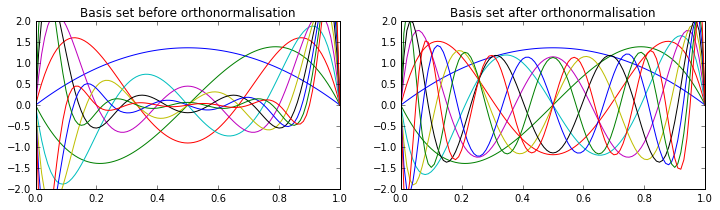

In [2]:
# Test polynomials
# Now set up the array of basis functions - specify the size of the basis
num_basis = 10
# These arrays will each hold an array of functions
basis_array = np.zeros((num_basis,num_x_points))
second_derivative_basis_array = np.zeros((num_basis,num_x_points))

def polynomial(x,n,width):
    func = x*(width-x)
    print "n is ",n
    for i in range(n):
        print "zero point is ",(i+1.0)/(n+1.0)
        func = func*(x-width*((i+1.0)/(n+1.0)))
    return func

def second_derivative_finite(f,dx):
    second_derivative = np.zeros(f.size)
    for i in range(1,f.size-1):
        second_derivative[i] = (f[i+1] + f[i-1] - 2.0*f[i])/(dx*dx)
    second_derivative[0] = (f[1]-2.0*f[0])/(dx*dx)
    second_derivative[f.size-1] = (f[f.size-2]-2.0*f[f.size-1])/(dx*dx)
    return second_derivative
 
# Define a figure to take two plots
fig = pl.figure(figsize=[12,3])
# Add subplots: number in y, x, index number
ax = fig.add_subplot(121,autoscale_on=False,xlim=(0,1),ylim=(-2,2))
ax.set_title("Basis set before orthonormalisation")
ax2 = fig.add_subplot(122,autoscale_on=False,xlim=(0,1),ylim=(-2,2))
ax2.set_title("Basis set after orthonormalisation")

for i in range(num_basis):
    basis_array[i,:] = polynomial(x,i,width)
    normalisation_factor = integrate_functions(basis_array[i,:],basis_array[i,:],dx)
    basis_array[i,:] = basis_array[i,:]/np.sqrt(normalisation_factor)
    ax.plot(x,basis_array[i,:])
    if i>0:
        for j in range(i):
            overlap = integrate_functions(basis_array[i,:],basis_array[j,:],dx)
            basis_array[i,:] = basis_array[i,:] - overlap*basis_array[j,:]
    normalisation_factor = integrate_functions(basis_array[i,:],basis_array[i,:],dx)
    basis_array[i,:] = basis_array[i,:]/np.sqrt(normalisation_factor)
    second_derivative_basis_array[i,:] = second_derivative_finite(basis_array[i,:],dx)
    ax2.plot(x,basis_array[i,:])
 
print
print "Now check that the basis set is orthonormal"
print
for i in range(num_basis):
    for j in range(num_basis):
        overlap = integrate_functions(basis_array[i,:],basis_array[j,:],dx)
        print "%8.3f" % overlap,
    print


### Using the basis set

Now that we have defined our basis, we can use it to build a Hamiltonian and solve the square well problem, in the usual manner.  But we will **not** expect the Hamiltonian to be diagonal in this basis.  We will then diagonalise the Hamiltonian to find the eigenvalues in this finite basis, and compare them to the exact result.  We'll also look at the eigenvectors.

In [3]:
# First let's solve the simple square well
# Declare space for the matrix elements - simplest with the identity function
H_Matrix = np.eye(num_basis)

# Define a function to act on a basis function with the potential
def Add_Potential_to_basis(Hphi,V,phi):
    for i in range(V.size):
        Hphi[i] = Hphi[i] + V[i]*phi[i]
        
print "Full Hamiltonian"
# Loop over basis functions phi_n (the bra in the matrix element)
# Calculate and store the matrix elements for the full Hamiltonian
for n in range(num_basis):
    # Loop over basis functions phi_m (the ket in the matrix element)
    for m in range(num_basis):
        # Act with H on phi_m and store in H_phi_m
        # First the kinetic energy
        H_phi_m = -0.5*second_derivative_basis_array[m] 
        # Potential is zero for the pure square well
        # Create matrix element by integrating
        H_mn = integrate_functions(basis_array[n],H_phi_m,dx)
        H_Matrix[m,n] = H_mn
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % H_mn,
    # This print puts in a new line when we have finished looping over m
    print

Full Hamiltonian
   5.000    0.000    1.729   -0.000    0.957   -0.000    0.623   -0.000    0.439   -0.000
   0.000   20.990   -0.000    9.915   -0.000    6.047   -0.000    4.121    0.000    2.966
   1.729    0.000   50.928    0.000   28.178    0.000   18.347    0.000   12.913    0.000
  -0.000    9.915    0.000   98.688   -0.000   60.189    0.000   41.020    0.000   29.524
   0.957   -0.000   28.178    0.000  167.968    0.000  109.363    0.000   76.974    0.000
   0.000    6.047    0.000   60.189   -0.000  262.161    0.000  178.665   -0.000  128.597
   0.623    0.000   18.347   -0.000  109.363    0.000  384.170   -0.000  270.394   -0.000
  -0.000    4.121    0.000   41.020    0.000  178.665   -0.000  536.190   -0.000  385.930
   0.439    0.000   12.913    0.000   76.974    0.000  270.394   -0.000  719.459    0.000
   0.000    2.966    0.000   29.524    0.000  128.597    0.000  385.930    0.000  934.016


In [4]:
# Solve using linalg module of numpy (which we've imported as la above)
EigenValues, Eigenvectors = la.eigh(H_Matrix)
# This call above does the entire solution for the eigenvalues and eigenvectors !
# Print results roughly, though apply precision of 4 to the printing
np.set_printoptions(precision=4)
print EigenValues
print Eigenvectors[0]
print Eigenvectors[1]
print Eigenvectors[2]

[    4.9344    19.7327    44.3804    78.8532   123.2618   177.7711
   264.0253   359.6702   890.9226  1216.0167]
[  9.9928e-01  -7.5045e-15  -3.7010e-02  -5.4982e-16   8.0193e-03
  -3.0331e-16   3.1466e-03  -7.0542e-17  -1.0064e-03  -3.9935e-17]
[ -7.3101e-15  -9.9144e-01   1.5543e-15   1.2393e-01  -1.6653e-16
   3.7062e-02  -2.7756e-16   1.6914e-02   2.7756e-16   5.3650e-03]
[ -3.8006e-02  -8.8818e-16  -9.6852e-01   1.7764e-15   2.2668e-01
   9.7145e-17   9.0925e-02   1.1102e-16  -2.9471e-02   8.9338e-17]


In [5]:
# Now print out eigenvalues and the eigenvalues of the perfect square well, and the difference
print " Changed Original  Difference"
for i in range(num_basis):
    n = i+1
    print "%8.3f %8.3f %8.3f" % (EigenValues[i],n*n*np.pi*np.pi/2.0,EigenValues[i] - n*n*np.pi*np.pi/2.0)

 Changed Original  Difference
   4.934    4.935   -0.000
  19.733   19.739   -0.006
  44.380   44.413   -0.033
  78.853   78.957   -0.104
 123.262  123.370   -0.108
 177.771  177.653    0.118
 264.025  241.805   22.220
 359.670  315.827   43.843
 890.923  399.719  491.204
1216.017  493.480  722.537


### Accuracy of a basis

We have just found that the eigenvalues for the square well using ten polynomials (instead of the eigenbasis) are very accurate for the first few eigenvalues, but then diverge - with errors which are close to 10% for $n=7$, getting larger after that.  What is happening ? 

This is (another) sign of a basis set that is finite: the first few eigenvectors are well represented by our ten basis functions, but as we get to higher eigenvectors with higher curvature our first ten basis functions do not describe these functions as well.  We can see this by plotting the eigenvectors, and the difference to the perfect eigenvectors, below.  You might like to try increasing the basis size, and seeing how the eigenvalues improve. (It is also possible that our finite different approximation is breaking down for the highest eigenvectors - you could try increasing the number of points used along the x axis to test this.)

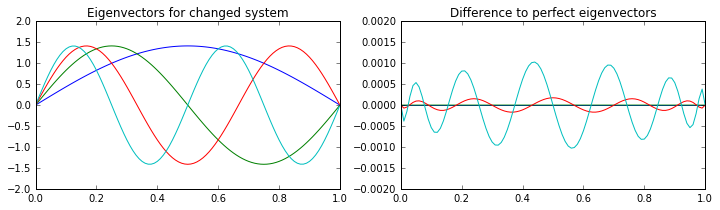

In [6]:
# Define a figure to take two plots
fig = pl.figure(figsize=[12,3])
# Add subplots: number in y, x, index number
ax = fig.add_subplot(121,autoscale_on=False,xlim=(0,1),ylim=(-2,2))
ax.set_title("Eigenvectors for changed system")
ax2 = fig.add_subplot(122,autoscale_on=False,xlim=(0,1),ylim=(-0.002,0.002))
ax2.set_title("Difference to perfect eigenvectors")
for m in range(4): # Plot the first four states
    psi = np.zeros(num_x_points)
    for i in range(num_basis):
        psi = psi+Eigenvectors[i,m]*basis_array[i]
    if psi[1] < 0:  # This is just to ensure that psi and the basis function have the same phase
        psi = -psi
    ax.plot(x,psi)
    fac = np.pi*(m+1)/width
    exact = np.sin(fac*x)
    normalisation_factor = integrate_functions(exact,exact,dx)
    exact = exact/np.sqrt(normalisation_factor)
    psi = psi - exact
    ax2.plot(x,psi)

## A change of basis

We have seen in lectures that to go from a matrix calculated in the basis $\left\{\vert\phi_n\rangle\right\}$ to the basis $\left\{\vert\chi_a\rangle\right\}$ we write $H^{(\chi)}_{ab} = \sum_{mn} S_{am}H^{(\phi)}_{mn}\left(S^\dagger\right)_{nb}$ with $S_{am} = \langle \chi_a\vert\phi_m\rangle$ and $\left(S^\dagger\right)_{nb} = \langle \phi_n\vert \chi_b\rangle$.  We can calculate this for the square well, treating the $\phi$ basis set as our polynomial basis set and the $\chi$ basis set as the eigenbasis.  In this case, the Hamiltonian $H^{(\chi)}$ should be diagonal, with the square well eigenvalues on the diagonal (because we have transformed representation into the eigenbasis).

In [7]:
# Define the eigenbasis - normalisation needed elsewhere
def Square_well_eigenbasis(n,width,norm,x):
    """The eigenbasis for a square well, running from 0 to a, sin(n pi x/a)"""
    fac = np.pi*n/width
    return norm*np.sin(fac*x)

# These arrays will each hold an array of functions
alternate_basis_array = np.zeros((num_basis,num_x_points))

# Loop over first num_basis basis states, normalise and create an array
# NB the basis_array will start from 0
for i in range(num_basis):
    n = i+1
    # Calculate A = <phi_n|phi_n>
    integral = integrate_functions(Square_well_eigenbasis(n,width,1.0,x),Square_well_eigenbasis(n,width,1.0,x),dx)
    # Use 1/sqrt{A} as normalisation constant
    normalisation = 1.0/np.sqrt(integral)
    alternate_basis_array[i,:] = Square_well_eigenbasis(n,width,normalisation,x)

# Now create the similarity matrix, S
similarity_matrix = np.eye(num_basis)
# Loop over basis functions chi_a (the bra in the matrix element)
# Calculate and store the matrix elements 
for a in range(num_basis):
    # Loop over basis functions phi_m (the ket in the matrix element)
    for m in range(num_basis):
        similarity_matrix[a,m] = integrate_functions(alternate_basis_array[a],basis_array[m],dx)
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % similarity_matrix[a,m],
    # This print puts in a new line when we have finished looping over m
    print

   0.999    0.000   -0.038    0.000    0.001    0.000   -0.000    0.000    0.000   -0.000
   0.000   -0.991   -0.000    0.130   -0.000   -0.008   -0.000    0.000   -0.000   -0.000
   0.037   -0.000    0.969    0.000   -0.245   -0.000    0.028    0.000   -0.002    0.000
   0.000   -0.124    0.000   -0.921   -0.000    0.364   -0.000   -0.064    0.000    0.007
   0.008   -0.000    0.226   -0.000    0.841    0.000   -0.477    0.000    0.117   -0.000
   0.000   -0.037    0.000   -0.324    0.000   -0.728   -0.000    0.573    0.000   -0.185
   0.003   -0.000    0.084    0.000    0.405    0.000    0.586    0.000   -0.642   -0.000
  -0.000   -0.015    0.000   -0.144    0.000   -0.457   -0.000   -0.422   -0.000    0.678
   0.001    0.000    0.040    0.000    0.210   -0.000    0.475    0.000    0.248    0.000
  -0.000   -0.008    0.000   -0.076   -0.000   -0.272   -0.000   -0.457   -0.000   -0.075


Now that we have the matrix, we can transform from the polynomial basis to the eigenbasis.

In [14]:
print "Calculating S.H then S.H.S^{T}: "
similarity_matrix_x_H = np.dot(similarity_matrix,H_Matrix)
alt_H = np.dot(similarity_matrix_x_H,similarity_matrix.T)
for n in range(num_basis):
    # Loop over basis functions phi_m (the ket in the matrix element)
    for m in range(num_basis):
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % alt_H[n,m],
    # This print puts in a new line when we have finished looping over m
    print
    
# There is no need to do this - it should give exactly the same result
# But it is a useful consistency check and may give a hint to any asymmetries
print "Calculating H.S^{T} then S.H.S^{T}: "
similarity_matrix_x_H = np.dot(H_Matrix,similarity_matrix.T)
alt_H2 = np.dot(similarity_matrix,similarity_matrix_x_H)
for n in range(num_basis):
    # Loop over basis functions phi_m (the ket in the matrix element)
    for m in range(num_basis):
        # The comma at the end prints without a new line; the %8.3f formats the number
        print "%8.3f" % alt_H2[n,m],
    # This print puts in a new line when we have finished looping over m
    print

Calculating S.H then S.H.S^{T}: 
   4.934   -0.000   -0.000    0.000    0.000   -0.000   -0.000    0.000    0.000    0.000
  -0.000   19.733   -0.000   -0.000    0.000    0.000   -0.000   -0.000   -0.000    0.000
  -0.000    0.000   44.380   -0.000   -0.001   -0.000    0.015   -0.000   -0.016   -0.000
   0.000   -0.000    0.000   78.853   -0.000   -0.017    0.000    0.122   -0.000   -0.069
   0.000   -0.000   -0.001    0.000  123.344    0.000   -2.580    0.000    2.241   -0.000
   0.000    0.000    0.000   -0.017   -0.000  178.206    0.000   -7.399   -0.000    2.309
  -0.000    0.000    0.015   -0.000   -2.580    0.000  267.082   -0.000   -2.525   -0.000
  -0.000   -0.000   -0.000    0.122    0.000   -7.399   -0.000  357.306   -0.000   28.317
   0.000   -0.000   -0.016   -0.000    2.241   -0.000   -2.525    0.000  233.413   -0.000
   0.000    0.000   -0.000   -0.069   -0.000    2.309   -0.000   28.317   -0.000  218.559
Calculating H.S^{T} then S.H.S^{T}: 
   4.934   -0.000   -0.000    

In [9]:
# Print the diagonal of the Hamiltonian from polynomial basis (Poly), the exact eigenvalue (Eigen) and the difference
print "    Poly    Eigen   Difference"
for i in range(num_basis):
    n = i+1
    print "%8.3f %8.3f %8.3f" %(alt_H[i,i], n*n*np.pi*np.pi/2.0,alt_H[i,i]-n*n*np.pi*np.pi/2.0)

    Poly    Eigen   Difference
   4.934    4.935   -0.000
  19.733   19.739   -0.006
  44.380   44.413   -0.033
  78.853   78.957   -0.104
 123.344  123.370   -0.026
 178.206  177.653    0.553
 267.082  241.805   25.277
 357.306  315.827   41.478
 233.413  399.719 -166.306
 218.559  493.480 -274.921


Notice that, for the first few (I would say five) eigenvalues this is very accurate.  After that, errors start to creep in, just as we saw for the eigenvalues we calculated by diagonalising the Hamiltonian in the polynomial basis.  This is again a manifestation of the truncated, approximate basis failing to represent the high energy states of the well accurately.